In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re as r 

##

Conversion Rate – The percentage of users who complete a desired action (e.g., purchase, sign-up) after clicking an ad.

Acquisition Cost – The cost of acquiring a new customer through the campaign.

ROI (Return on Investment) – Measures profitability: how much revenue is gained compared to the money spent on ads.

Engagement Score – A metric that shows how much users interact with an ad (likes, comments, shares, etc.).

CTR (Click-Through Rate) – The percentage of people who click on an ad after seeing it.

In [4]:
df=pd.read_csv(r'C:\Users\Fatya\Documents\Social_Media_Advertising.csv')
df


,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,565525,Men 25-34,Market Expansion,60 Days,Instagram,0.14,$15000.00,4.950000,Los Angeles,English,39999,119998,7,Technology,2022-10-17,Code Crafters
299996,539680,Women 25-34,Market Expansion,60 Days,Instagram,0.08,$15000.00,3.410000,Austin,Spanish,39999,119998,8,Technology,2022-02-25,Innovate Infinity
299997,140032,Women 35-44,Brand Awareness,60 Days,Pinterest,0.09,$15000.00,0.904461,Miami,French,23492,77476,1,Food,2022-10-02,Gastronomy Guild
299998,161067,Women 18-24,Market Expansion,60 Days,Instagram,0.13,$15000.00,7.430000,Las Vegas,Spanish,39999,119999,10,Food,2022-01-24,Savor Street


## Distribution of Clicks and Impressions
.corr() computes the Pearson correlation coefficient, which measures the linear relationship between two variables.

The output will be a value between -1 and 1:

1 → Strong positive correlation (more impressions = more clicks)

0 → No correlation (impressions and clicks are unrelated)

-1 → Strong negative correlation (more impressions = fewer clicks, unlikely in this case)

In [5]:
df[['Clicks','Impressions']].corr()

,Clicks,Impressions
Clicks,1.000000,0.998769
Impressions,0.998769,1.000000


# Language Count by Location

In [6]:
df.groupby(['Language','Location'])[['Campaign_ID']].count().sort_values(by='Language',ascending=0)

Campaign_ID
Language Location                
Spanish  Austin             20012
         Las Vegas          20043
         Los Angeles        20347
         Miami              19894
         New York           19774
French   Austin             19838
         Las Vegas          19676
         Los Angeles        20070
         Miami              20141
         New York           20089
English  Austin             19999
         Las Vegas          20010
         Los Angeles        19905
         Miami              20206
         New York           19996

# Location Count

In [7]:
location_count=df.groupby('Location')[['Campaign_ID']].count().sort_values(by='Campaign_ID',ascending=0)
location_count

,Campaign_ID
Location,
Los Angeles,60322
Miami,60241
New York,59859
Austin,59849
Las Vegas,59729


C:\Users\Fatya\AppData\Local\Temp\ipykernel_12196\3573381696.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_count,x='Location',y='Campaign_ID',palette='viridis')


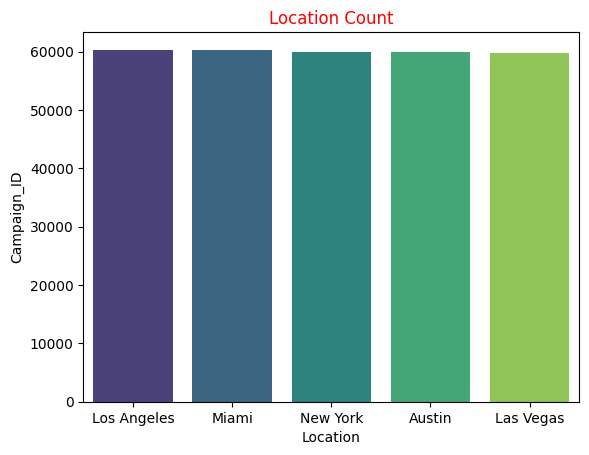

In [8]:
sns.barplot(data=location_count,x='Location',y='Campaign_ID',palette='viridis')
plt.title('Location Count',color='r')
plt.show()

In [9]:
df['Acquisition_Cost']=df['Acquisition_Cost'].replace(r'\$','',regex=True)
df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'])


## calculating the ctr 
## CTR measures the percentage of users who saw an ad and clicked on it. A higher CTR indicates a more engaging ad campaign.

In [10]:
df['CTR']=(df['Clicks']/df['Impressions'])*100

In [11]:
df

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company,CTR
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,500.0,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align,16.666667
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,500.0,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony,16.666667
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,500.0,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit,16.666667
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,500.0,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish,15.126484
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,500.0,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony,15.126484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,565525,Men 25-34,Market Expansion,60 Days,Instagram,0.14,15000.0,4.950000,Los Angeles,English,39999,119998,7,Technology,2022-10-17,Code Crafters,33.333056
299996,539680,Women 25-34,Market Expansion,60 Days,Instagram,0.08,15000.0,3.410000,Austin,Spanish,39999,119998,8,Technology,2022-02-25,Innovate Infinity,33.333056
299997,140032,Women 35-44,Brand Awareness,60 Days,Pinterest,0.09,15000.0,0.904461,Miami,French,23492,77476,1,Food,2022-10-02,Gastronomy Guild,30.321648
299998,161067,Women 18-24,Market Expansion,60 Days,Instagram,0.13,15000.0,7.430000,Las Vegas,Spanish,39999,119999,10,Food,2022-01-24,Savor Street,33.332778


In [12]:
df.describe()


,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,CTR
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,550444.804487,0.080009,7753.750796,3.177691,18153.670370,56034.236387,4.369217,31.415602
std,260252.586037,0.040563,4301.035148,2.461200,11027.023294,32583.136334,3.156492,2.465685
min,100001.000000,0.010000,500.000000,0.000000,293.000000,1937.000000,1.000000,15.118679
25%,325003.500000,0.050000,4121.915000,0.930000,8821.000000,28362.000000,1.000000,30.169752
50%,551164.500000,0.080000,7755.900000,2.670000,17230.000000,54098.000000,4.000000,32.537278
75%,776284.500000,0.110000,11385.075000,5.330000,26808.000000,80925.250000,7.000000,33.126583
max,999998.000000,0.150000,15000.000000,8.000000,40000.000000,120000.000000,10.000000,33.333333


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  float64
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company           300000 non-null  object 
 16  CTR               30

 ## Checking if there are any null values in this data

In [14]:
df.isnull().sum()

Campaign_ID         0
Target_Audience     0
Campaign_Goal       0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
Company             0
CTR                 0
dtype: int64

## Checking data distribution



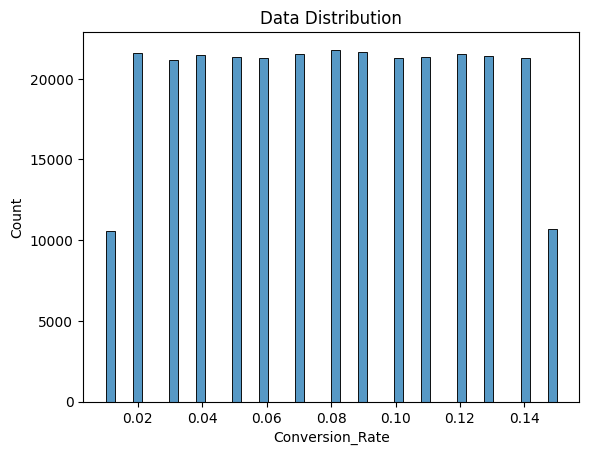

In [15]:
sns.histplot(df['Conversion_Rate'],bins=50,kde=False)
plt.title('Data Distribution')
plt.show()

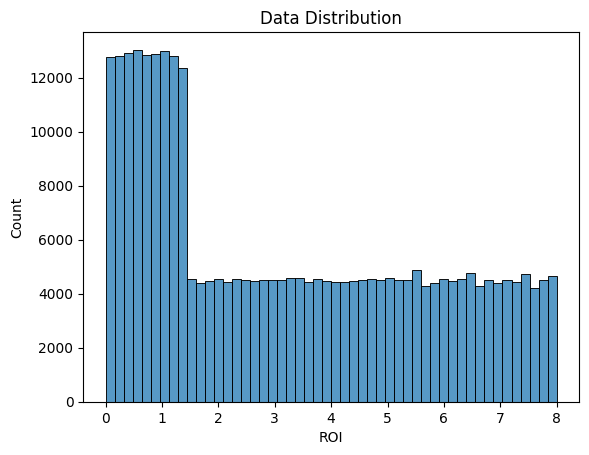

In [16]:
sns.histplot(df['ROI'],bins=50,kde=False)
plt.title('Data Distribution')
plt.show()

### A/B Testing Analysis
### Compare conversion rates of two groups (A & B) using a statistical test t-test.
### Visualize results using bar charts.

🔹 Why Do We Use the t-test?
A t-test is used to compare the means of two groups and check if their difference is statistically significant. In A/B testing, this helps answer questions like:

Did Campaign A generate significantly more conversions than Campaign B?

Did the new website design increase user engagement compared to the old one?

Without a statistical test, you might see a difference, but you won't know if it happened by chance or if it's a real effect.

🔹 What is the p-value?

The p-value tells us the probability that the observed difference is due to chance rather than a real effect.

If p-value < 0.05 (or another chosen threshold), we reject the null hypothesis (which assumes there’s no difference between A and B). This means the difference is statistically significant.

If p-value > 0.05, we fail to reject the null hypothesis, meaning there's not enough evidence to say the two groups are different.

In [17]:

group_A=df[df['Channel_Used']=='Facebook']
group_B=df[df['Channel_Used']=='Instagram']

In [18]:
print('Facebook Conversion Rate', group_A['Conversion_Rate'].mean())
print('Instagram Conversion Rate', group_B['Conversion_Rate'].mean())

Facebook Conversion Rate 0.07987001756159864
Instagram Conversion Rate 0.07976431738592031


In [19]:
import scipy.stats as stats

In [20]:
t_stat, p_value=stats.ttest_ind(group_A['Conversion_Rate'],group_B['Conversion_Rate'])
print(f"T-statistics' {t_stat},'P_value' {p_value}")

if p_value<0.05:
    print('Significant difference found: One platform converts better!')
else:
    print('No significant difference: Both platforms perform similarly')

T-statistics' 0.5046857468375112,'P_value' 0.613780313603102
No significant difference: Both platforms perform similarly


## Instagram vs. Pinterest A/B Testing

In [21]:
group_C=df[df['Channel_Used']=='Pinterest']

In [22]:
print('Pinterest Conversion Rate',group_C['Conversion_Rate'].mean())

Pinterest Conversion Rate 0.08004222050558059


In [23]:
t_stat, p_value=stats.ttest_ind(group_B['Conversion_Rate'],group_C['Conversion_Rate'])
print(f"T-statistics' {t_stat},\n'P_value' {p_value}")

if p_value<0.05:
    print('Significant difference found: One platform converts better!')
else:
    print('No significant difference: Both platforms perform similarly')

T-statistics' -1.3263696725158618,
'P_value' 0.1847192961676917
No significant difference: Both platforms perform similarly


# Facebook vs. Twitter

In [24]:
group_D=df[df['Channel_Used']=='Twitter']

In [25]:
print('Twitter Conversion Rate', group_D['Conversion_Rate'].mean())

Twitter Conversion Rate 0.08036328077907118


In [26]:
t_stat,p_value=stats.ttest_ind(group_A['Conversion_Rate'],group_D['Conversion_Rate'])
print(f"T-Statistics {t_stat},\nP-value {p_value}")

if p_value<0.05:
    print("Signifince difference found : One platform converts better !")
else:
    print('No significant difference: Both platforms perform similarly ')


T-Statistics -2.3554804509616853,
P-value 0.01850005193452198
Signifince difference found : One platform converts better !


#### Vizualization of the difference between Faceboook and Twitter 

C:\Users\Fatya\AppData\Local\Temp\ipykernel_12196\4280145179.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=facebook_twitter,x='Channel_Used',y='Conversion_Rate',ci=None,color="blue")


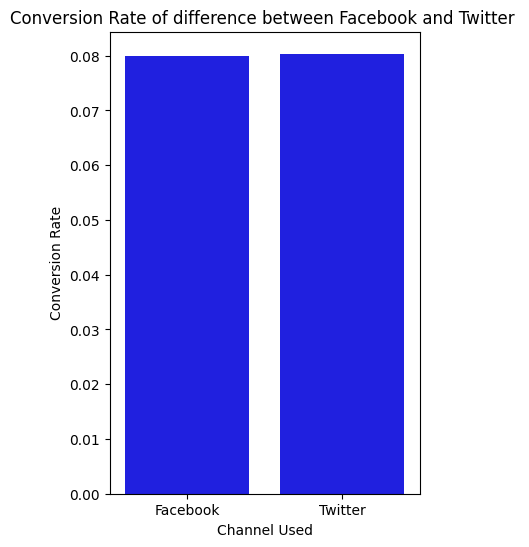

In [27]:
facebook_twitter=df[df['Channel_Used'].isin(['Facebook','Twitter'])]
plt.figure(figsize=(4,6))
sns.barplot(data=facebook_twitter,x='Channel_Used',y='Conversion_Rate',ci=None,color="blue")
plt.title('Conversion Rate of difference between Facebook and Twitter ')
plt.xlabel('Channel Used')
plt.ylabel('Conversion Rate')
plt.show()

#### Pinterest vs. Twitter Conversion rate difference 

In [28]:
t_test,p_value=stats.ttest_ind(group_D['Conversion_Rate'],group_C['Conversion_Rate'])
print(f'T-test {t_test},\n P-value {p_value}')

if p_value<0.05:
    print('Signifince difference found : One platform converts better !')
else:
    print('No significant difference: Both platforms perform similarly ')

T-test 1.5325461732534187,
 P-value 0.12538982530932097
No significant difference: Both platforms perform similarly 


### Facebook vs Pinterest Conversion rate difference


In [29]:
t_test,p_value=stats.ttest_ind(group_A['Conversion_Rate'],group_D['Conversion_Rate'])
print(f'T-test: {t_test} ,\n P-value {p_value}')

if p_value<0.05:
    print('Signifince difference found one platform is better')
else:
    print('no significant difference:both platforms perform similarly')

T-test: -2.3554804509616853 ,
 P-value 0.01850005193452198
Signifince difference found one platform is better


## Attribution Model Analysis
Determine which marketing channels lead to the most conversions.

In [30]:
df.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company,CTR
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,500.0,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align,16.666667
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,500.0,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony,16.666667
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,500.0,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit,16.666667
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,500.0,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish,15.126484
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,500.0,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony,15.126484


In [31]:
channel_conversions=df.groupby('Channel_Used')['Conversion_Rate'].mean()
channel_conversions

Channel_Used
Facebook     0.079870
Instagram    0.079764
Pinterest    0.080042
Twitter      0.080363
Name: Conversion_Rate, dtype: float64

In [32]:
colors = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F', '#9B59B6']

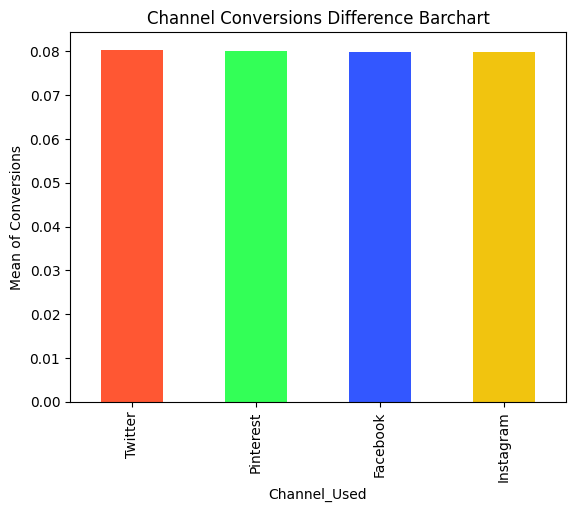

In [33]:
channel_conversions.sort_values(ascending=False).plot(kind='bar',color=colors)
plt.title('Channel Conversions Difference Barchart')
plt.ylabel('Mean of Conversions')
plt.show()

## Deep Dive into Key Metrics
Compare CTR & Conversion Rate across different Channels


In [34]:
df_grouped=df.groupby('Channel_Used').agg({'CTR':'mean','Conversion_Rate':'mean'})
df_grouped

,CTR,Conversion_Rate
Channel_Used,,
Facebook,32.135894,0.079870
Instagram,32.131680,0.079764
Pinterest,29.239640,0.080042
Twitter,32.158472,0.080363


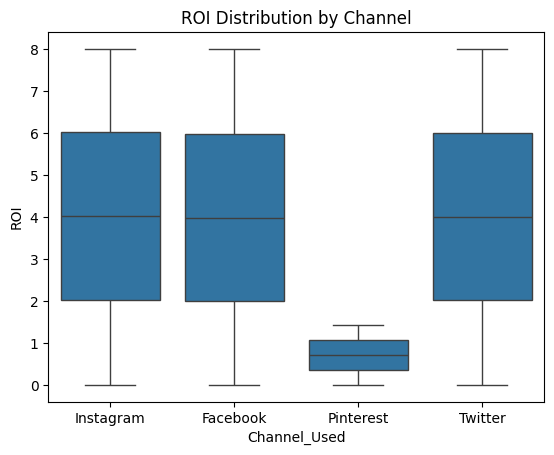

In [35]:
sns.boxplot(x='Channel_Used' ,y='ROI',data=df)
plt.title('ROI Distribution by Channel')
plt.show()

#### Check Correlation Between Metrics
####  Does higher CTR lead to higher Conversion Rate?

## Customer Segmentation Insights

Which segment has the highest engagement?

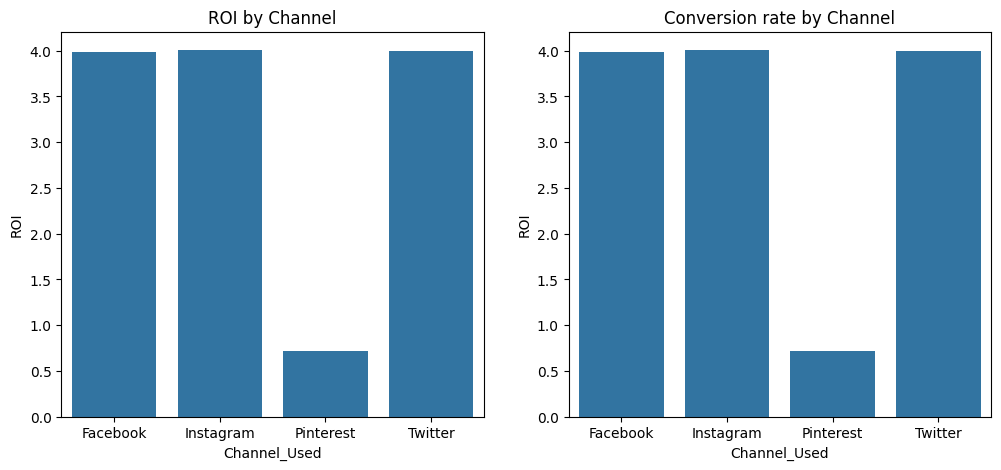

In [36]:
df_grouped=df.groupby('Channel_Used').agg({'ROI':'mean','Conversion_Rate':'mean'}).reset_index()
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.barplot(x='Channel_Used',y='ROI',data=df_grouped,ax=ax[0])
ax[0].set_title('ROI by Channel')

sns.barplot(x='Channel_Used',y='ROI',data=df_grouped,ax=ax[1])
ax[1].set_title('Conversion rate by Channel')

plt.show()

In [37]:
df_grouped=df.groupby('Customer_Segment')['Engagement_Score'].mean().reset_index()
df_grouped

,Customer_Segment,Engagement_Score
0,Fashion,4.379062
1,Food,4.365020
2,Health,4.384532
3,Home,4.348852
4,Technology,4.368633


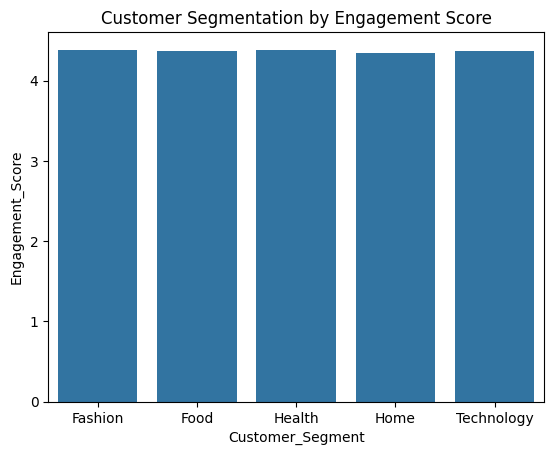

In [38]:
df_grouped=df.groupby('Customer_Segment')['Engagement_Score'].mean().reset_index()
sns.barplot(x='Customer_Segment',y='Engagement_Score',data=df_grouped)
plt.title('Customer Segmentation by Engagement Score')
plt.show()

In [39]:
con_grouped=df.groupby('Customer_Segment')['Conversion_Rate'].mean().reset_index()
con_grouped

,Customer_Segment,Conversion_Rate
0,Fashion,0.080100
1,Food,0.079913
2,Health,0.079935
3,Home,0.080045
4,Technology,0.080054


In [40]:
impression_grouped=df.groupby('Channel_Used')['Conversion_Rate'].mean().reset_index()
impression_grouped

,Channel_Used,Conversion_Rate
0,Facebook,0.079870
1,Instagram,0.079764
2,Pinterest,0.080042
3,Twitter,0.080363


In [41]:
impression_grouped=df.groupby('Channel_Used')['Acquisition_Cost'].mean().reset_index()
impression_grouped

,Channel_Used,Acquisition_Cost
0,Facebook,7745.022816
1,Instagram,7726.252813
2,Pinterest,7769.738763
3,Twitter,7774.121680


### duration's relation to acquisition cost

In [42]:
df.groupby('Duration')['Acquisition_Cost'].mean()

Duration
15 Days     2166.803859
30 Days     5936.126131
45 Days     9571.252664
60 Days    13340.820531
Name: Acquisition_Cost, dtype: float64

### Trend of CTR over time

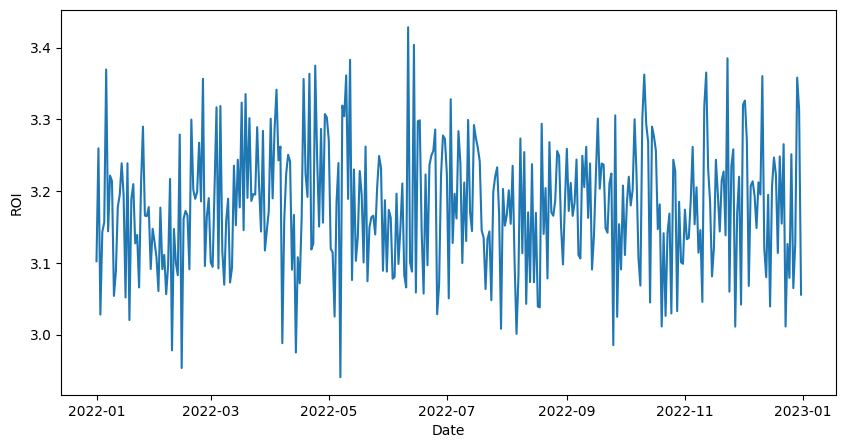

In [43]:
df['Date']=pd.to_datetime(df['Date'])
date_group=df.groupby('Date')['ROI'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x='Date',y='ROI',data=date_group)
plt.show()

#### Identify Which Platforms Have the Highest Engagement



In [48]:
df.groupby('Channel_Used')['Engagement_Score'].mean()

Channel_Used
Facebook     5.478394
Instagram    5.507650
Pinterest    1.000000
Twitter      5.495760
Name: Engagement_Score, dtype: float64

## finding which channel has the  highest ctr

C:\Users\Fatya\AppData\Local\Temp\ipykernel_12196\928822908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ctr_channel,x='Channel_Used',y='CTR',palette='viridis')


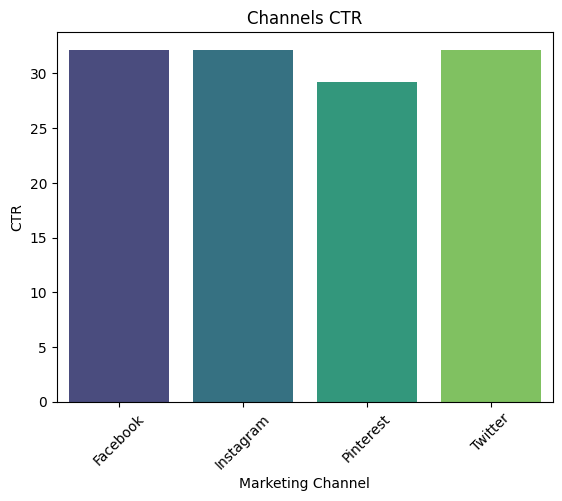

In [49]:
ctr_channel=df.groupby('Channel_Used',as_index=False)['CTR'].mean()
sns.barplot(data=ctr_channel,x='Channel_Used',y='CTR',palette='viridis')
plt.title('Channels CTR')
plt.xlabel('Marketing Channel')
plt.ylabel('CTR')
plt.xticks(rotation=45) 
plt.show()

## the maximum acquisition cost 


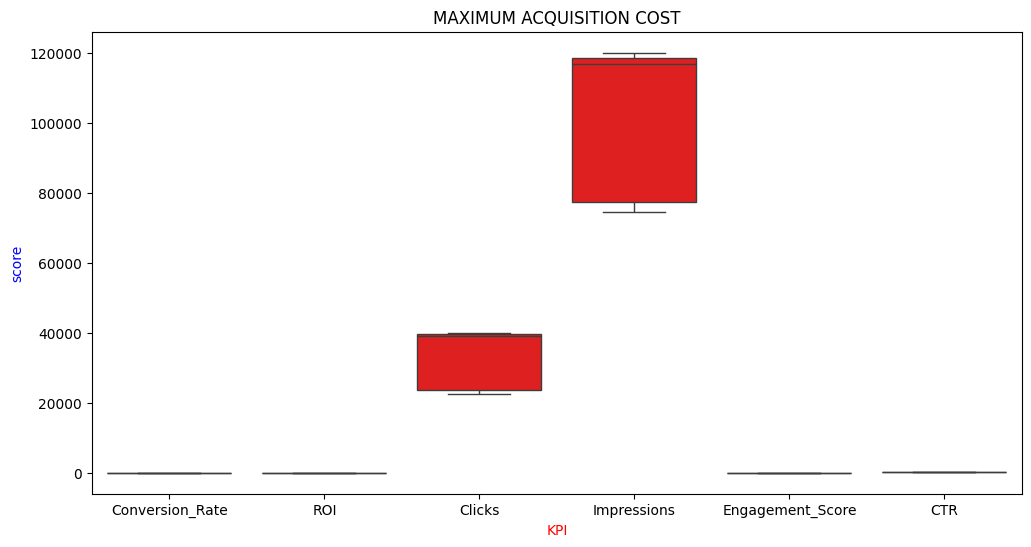

In [50]:
max_acq=df[df['Acquisition_Cost']==df['Acquisition_Cost'].max()]
columns_to_plot=max_acq[['Conversion_Rate','ROI','Clicks','Impressions','Engagement_Score','CTR']]
plt.figure(figsize=(12,6))
sns.boxplot(data=columns_to_plot,color='r')
plt.xlabel('KPI',color='red')
plt.ylabel('score',color='blue')
plt.title('MAXIMUM ACQUISITION COST')
plt.show()

In [51]:
df[df['Acquisition_Cost']==df['Acquisition_Cost'].min()]

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company,CTR
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,500.0,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align,16.666667
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,500.0,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony,16.666667
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,500.0,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit,16.666667
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,500.0,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish,15.126484
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,500.0,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony,15.126484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12036,738378,Men 45-60,Increase Sales,15 Days,Instagram,0.05,500.0,0.660000,Miami,Spanish,2084,7694,8,Technology,2022-06-16,Quantum Quirks,27.086041
12037,929190,All Ages,Brand Awareness,15 Days,Pinterest,0.12,500.0,0.089374,Las Vegas,English,1223,4967,1,Home,2022-05-19,Decor Dreams,24.622509
12038,538026,Men 35-44,Brand Awareness,15 Days,Facebook,0.15,500.0,7.970000,Los Angeles,Spanish,2085,7694,10,Technology,2022-07-28,Innovate Infinity,27.099038
12039,186988,Men 35-44,Brand Awareness,15 Days,Instagram,0.05,500.0,3.870000,New York,French,2085,7695,1,Fashion,2022-10-14,Silk & Style,27.095517


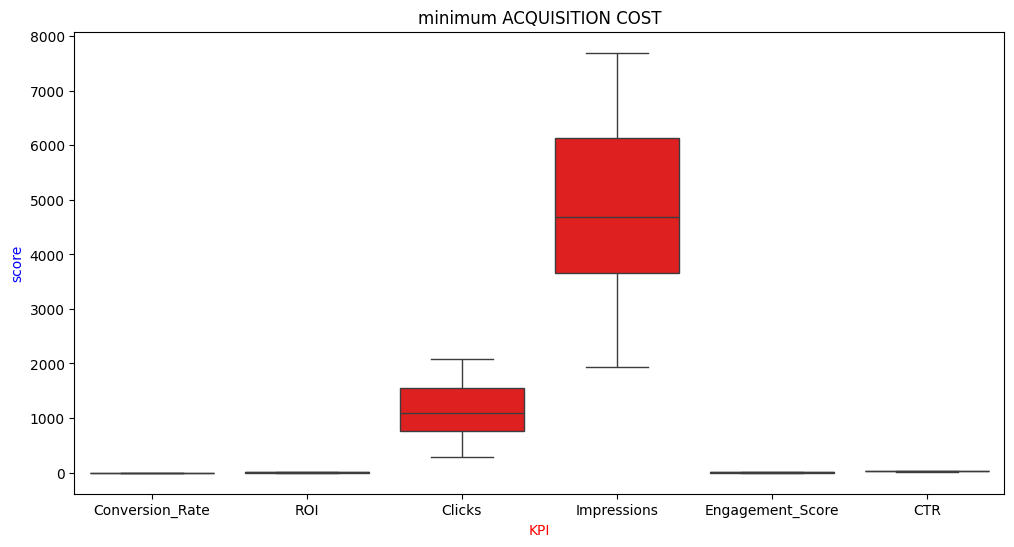

In [52]:
min_acq=df[df['Acquisition_Cost']==df['Acquisition_Cost'].min()]
min_acq_columns=min_acq[['Conversion_Rate','ROI','Clicks','Impressions','Engagement_Score','CTR']]
plt.figure(figsize=(12,6))
sns.boxplot(data=min_acq_columns,color='r')
plt.xlabel('KPI',color='red')
plt.ylabel('score',color='blue')
plt.title('minimum ACQUISITION COST')
plt.show()

## the maximum  clicks and impressions

In [53]:
df[df['Clicks']==df['Clicks'].max()]


,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company,CTR
299999,420183,Men 25-34,Brand Awareness,60 Days,Facebook,0.08,15000.0,1.9,Miami,English,40000,120000,10,Technology,2022-07-18,Innovate Infinity,33.333333


In [54]:
df['Company'].count()

np.int64(300000)

In [55]:
df['Company'].unique()

array(['Aura Align', 'Hearth Harmony', 'Cyber Circuit', 'Well Wish',
       'Space Spruce', 'Feast Flavors', 'Culinary Quest', 'Gourmet Grove',
       'Silicon Saga', 'Mode Maven', 'Homely Haven', 'Gadget Giants',
       'Domestic Dream', 'Heal Hub', 'Dwell Delight', 'Trend Tailors',
       'Gastronomy Guild', 'Nosh Nirvana', 'Vigor Valley', 'Balance Beam',
       'Style Sphere', 'Fiber Fashion', 'Attire Artistry',
       'Quantum Quirks', 'Savor Street', 'Fitness Front', 'Silk & Style',
       'Palate Paradise', 'NexGen Nerds', 'Living Luxe', 'Wellness Waves',
       'Tech Titans', 'Giga Geeks', 'Runway Rebels', 'Glam Garments',
       'Nest Neat', 'Elixir Essence', 'Dine Divine', 'Chic Couture',
       'Vital Vigor', 'Innovate Infinity', 'Bistro Bliss',
       'Epicurean Edge', 'Cozy Corners', 'Vogue Visions', 'Pulse Point',
       'Pixel Pioneers', 'Code Crafters', 'Decor Dreams', 'Furnish Fine'],
      dtype=object)

In [56]:
a=df.groupby('Company')[['Acquisition_Cost']].sum().sort_values(by='Acquisition_Cost',ascending=False)
a

,Acquisition_Cost
Company,
Space Spruce,47942770.03
Tech Titans,47836719.11
Balance Beam,47640328.83
Dine Divine,47435980.88
Vigor Valley,47252992.37
Attire Artistry,47241751.14
Palate Paradise,47216962.97
Nest Neat,47203363.32
Code Crafters,47110009.70


In [57]:
a=df.groupby('Company')[['Acquisition_Cost']].sum().sort_values(by='Acquisition_Cost',ascending=1)
a

,Acquisition_Cost
Company,
Nosh Nirvana,44900218.16
Cozy Corners,45086618.74
Pixel Pioneers,45128038.31
Well Wish,45600440.70
Chic Couture,45751384.62
Quantum Quirks,45800849.20
Hearth Harmony,45811918.90
Heal Hub,45873210.34
Elixir Essence,45889347.86
